Hello!
I'm happy to review your project today.
When I will see mistake at the first time, I will just point it out. I let you find it and fix it by 
yourself. I'm trying to prepare you to work as an Data Analyst. SO, at a real job, your team lead 
will do the same. But if you can't handle this task yet, I will give you a more accurate hint at the 
next iteration.
You will find my comments below - please do not move, modify or delete them.
You can find my comments in green, yellow or red boxes like this:
<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Success. Everything is done succesfully. </div>
<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Remarks. Some recommendations. </div>
<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
Needs fixing. The block requires some corrections. Work can't be accepted with the red 
comments. </div>
You can answer me by using this: 
<div class="alert alert-block alert-info"> <b>Student answer.</b> <a class="tocSkip"></a> 
</div>

<div class="alert alert-block alert-success">
    
<b>**General feedback**</b> <a class="tocSkip"></a>
    
Hi, Michael
    
I am happy to review your project today
    
There are many things that I like
    
- great project structure
- very nice visualizations
- almost all calculations are correct
- you completed all necessary tasks
    
<div class="alert alert-block alert-danger">
<b></b> <a class="tocSkip"></a>
There are just few critical issues Please fix it </div>
    
One more time and you will have it

<div class="alert alert-block alert-success">
    
<b>**General feedback v2**</b> <a class="tocSkip"></a>
    
Hi, Michael

Thank you for your correction
    
Almost perfect
    
<div class="alert alert-block alert-danger">
<b></b> <a class="tocSkip"></a>
We still have two issues. I have left you more detailed comments</div>
    
One more time and you will have it

<div class="alert alert-block alert-success">
    
<b>**General feedback v3**</b> <a class="tocSkip"></a>
    
Hi, Michael

Well done
    
Now your project is perfect
    
    
I am happy to say that your project has been accepted
    
Keep up good work and good luck in the next sprint

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Please add project title and short project description~~ </div>

Project 2: Shopping Habits of Instacart Customers
Using data from Instacart, I will be looking for any trends or patterns based on things such as the day of the week an order was placed, what time it was placed, what items were included in the order, and how often items were reordered.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep = ';')
instacart_orders.info()
#from instacart_orders.info() - 478967 total entries, 450148 non-null day_since_prior_order, float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [3]:
products = pd.read_csv('/datasets/products.csv', sep = ';')
products.info()
#from products.info() - 49694 total entries, 48436 non-null product_name, object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [4]:
order_products = pd.read_csv('/datasets/order_products.csv', sep = ';')
order_products.info(show_counts = True)
# from order_products.info(show_counts = True) - 4545007 entries, 4544171 non-null add_to_cart_order, float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [5]:
aisles = pd.read_csv('/datasets/aisles.csv', sep = ';')
aisles.info()
#from aisles.info() - 134 entries, 0 null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
departments = pd.read_csv('/datasets/departments.csv', sep = ';')
departments.info()
#from departments.info() - 21 total entries, 0 null entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Great We have all necessary data </div>

## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [7]:
# Check for duplicated orders
print(instacart_orders.duplicated().sum())

15


In [8]:
# Check for all orders placed Wednesday at 2:00 AM
# from dataset, time is on 24HR clock, so hour_of_day = 2,
# without knowing what day of the week 0 is, assume week starts on Monday, order_dow = 0 means Monday -> order_dow = 2 means Wednesday
instacart_orders[(instacart_orders['order_dow'] == 2) & (instacart_orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
1295,1474941,115569,5,2,2,28.0
2391,1640269,173965,15,2,2,2.0
2550,1223696,55276,11,2,2,30.0
5965,579194,85018,14,2,2,11.0
17680,2004230,203121,4,2,2,8.0
...,...,...,...,...,...,...
457660,1562381,19378,5,2,2,6.0
460316,1986084,117453,81,2,2,8.0
462676,1362113,19654,20,2,2,21.0
472800,1746383,88484,19,2,2,5.0


<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
~~It is better to use display instead of print for dataframes~~ </div>

<div class="alert alert-block alert-info"> <b>Student answer.</b> <a class="tocSkip"></a> 
</div>
Reprinted the dataframes with the display instead of print function, thanks! </div>

In [9]:
# Remove duplicate orders
instacart_orders = instacart_orders.drop_duplicates()

In [10]:
# Double check for duplicate rows
instacart_orders.duplicated().sum()

0

In [11]:
# Double check for duplicate order IDs only
duplicate_order_id_count = instacart_orders['order_id'].duplicated().sum()
print(duplicate_order_id_count)

0


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Perfect </div>

### `products` data frame

In [12]:
# Check for fully duplicate rows
print(products.duplicated().sum())

0


In [13]:
# Check for just duplicate product IDs
print(products['product_id'].duplicated().sum())

0


In [14]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'] = products['product_name'].str.lower()
products['product_name'].duplicated().sum()

1361

In [15]:
# Check for duplicate product names that aren't missing
non_missing = products['product_name'].dropna()
duplicates = non_missing[non_missing.duplicated()]
print(duplicates)

2058                                     biotin 1000 mcg
5455                    green tea with ginseng and honey
5558                              cream of mushroom soup
7558                           cinnamon rolls with icing
9037                              american cheese slices
                              ...                       
49689                      high performance energy drink
49690                      original pancake & waffle mix
49691    organic instant oatmeal light maple brown sugar
49692                             spring water body wash
49693                            burrito- steak & cheese
Name: product_name, Length: 104, dtype: object


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Everything is correct </div>

### `departments` data frame

In [16]:
print(departments.duplicated().sum())
# No duplicates found in the departments df, I should probably look for missing values next

0


In [17]:
print(departments.isna().sum())
# No missing departments found

department_id    0
department       0
dtype: int64


### `aisles` data frame

In [18]:
print(aisles.duplicated().sum())
# No duplicated aisles found either

0


In [19]:
print(aisles.isna().sum())
# No missing aisles found

aisle_id    0
aisle       0
dtype: int64


### `order_products` data frame

In [20]:
# Check for fullly duplicate rows
print(order_products.duplicated().sum())

0


In [21]:
# Double check for any other tricky duplicates
order_products.duplicated(subset = ['order_id','product_id']).sum()

0

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Right</div>

## Find and remove missing values


### `products` data frame

In [22]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13


In [23]:
# Are all of the missing product names associated with aisle ID 100?
missing_product_names = products[products['product_name'].isna()]
missing_product_aisle = missing_product_names['aisle_id'].unique()
print(missing_product_aisle)

[100]


In [24]:
# Are all of the missing product names associated with department ID 21?
missing_product_department = missing_product_names['department_id'].unique()
print(missing_product_department)

[21]


In [25]:
# What is this ailse and department?
# print out aisle 100 and department 21 names
print(departments[departments['department_id'] == 21]['department'].unique())
print(aisles[aisles['aisle_id'] == 100]['aisle'].unique())

['missing']
['missing']


In [26]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
print(products[products['product_name'] == 'Unknown'])
# the above line shows 1258 rows of Unknown product names, but how do I prove they're all from aisle 100 and dept 21?

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Great </div>

<div class="alert alert-block alert-info"> <b>Student answer.</b> <a class="tocSkip"></a> 
</div>
I asked this question in my comment above, is there a way to output a Boolean that would reconfirm all these products are from aisle_id 100 and department_id 21? There's 1258 results so I wouldn't go through and check by hand I wouldn't think

<div class="alert alert-block alert-success"> <b>Reviewer's comment v2</b> <a 
class="tocSkip"></a>
    
You can leave rows for department_id 21 and aisle id 100 and check how many missing values we have there 
    
    products.query('department_id == 21 and aisle_id == 100')['product_name'].unique()
    
Also you can concat these 2 columns and find missing values for their combination
    
    products['ais_and_dep'] = products['aisle_id'].astype(str) +' ' + products['department_id'].astype(str)
    
    products[products['product_name'] == 'Unknown']['ais_and_dep'].unique()


</div>

### `orders` data frame

In [27]:
instacart_orders.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [28]:
# Are there any missing values where it's not a customer's first order?
print(instacart_orders[instacart_orders['order_number'] != 1]['order_number'].isna().sum())

0


<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Right </div>

### `order_products` data frame

In [29]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [30]:
# What are the min and max values in this column?
max_add_order = order_products['add_to_cart_order'].max()
min_add_order = order_products['add_to_cart_order'].min()
print(f'The min value in add_to_cart_order is: {min_add_order}')
print(f'The max value in add_to_cart_order is: {max_add_order}')

The min value in add_to_cart_order is: 1.0
The max value in add_to_cart_order is: 64.0


In [31]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_id = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()

In [32]:
# Do all orders with missing values have more than 64 products?
missing_values = order_products[order_products['add_to_cart_order'].isna()]
res = order_products.query('order_id in @missing_id')
#print(res.value_counts())
#REVIEWER COMMENT
print(res.order_id.value_counts())
product_counts = missing_values.groupby('order_id')['product_id'].count()
more_than_64 = product_counts[product_counts > 64].sum()
print()
print(more_than_64)
# the result shows us that all orders that have missing values in add_to_cart_order do not contain more than 64 products

61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
747668      65
2170451     65
2729254     65
2652650     65
9310        65
Name: order_id, Length: 70, dtype: int64

0


<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
~~Not correct~~ 
    
~~1 Please create the list of orders with missing values~~

~~2 Leave in order_products only rows with order_id in list from step 1~~
    
~~3 Group result of step 2 (or use values counts for order id) by order_id and count number of products~~
    
~~4 Compare each value with 64~~

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>
    
~~1 You already found order_ids with missing values Please save it~~
    
    missing_order_id = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
    
~~2 Now we need to leave in order_products only missing_order_id You can make it by using query~~
    
    res = order_products.query('order_id in @missing_order_id')
    
~~3 After we use value_counts for order_id in res and check if values are more than 64~~
    
    
    

<div class="alert alert-block alert-warning"> <b>Reviewer's comment v3</b> <a 
class="tocSkip"></a>
    
There was tiny typo Instead of 
    
    res.value_counts()
    
    
we need to use
    
    res.order_id.value_counts()
    
Now we can see that all orders with NaNs have more than 64 products
    

In [33]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int64')
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [34]:
#max_hour_of_day = instacart_orders['order_hour_of_day'].max()
#min_hour_of_day = instacart_orders['order_hour_of_day'].min()
#print(f'order_hour_of_day ranges from {min_hour_of_day} to {max_hour_of_day}')
order_hour = instacart_orders['order_hour_of_day'].unique()
sorted_hour = sorted(order_hour)
sorted_hour

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [35]:
#max_dow = instacart_orders['order_dow'].max()
#min_dow = instacart_orders['order_dow'].min()
#print(f'order_dow ranges from {min_dow} to {max_dow}')
order_day = instacart_orders['order_dow'].unique()
sorted_day = sorted(order_day)
sorted_day

[0, 1, 2, 3, 4, 5, 6]

<div class="alert alert-block alert-warning"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
    
~~It is better to use unique to check that all values are correct~~ </div>

<div class="alert alert-block alert-info"> <b>Student answer.</b> <a class="tocSkip"></a> 
</div>
Much cleaner using unique! Thanks!

### [A2] What time of day do people shop for groceries?

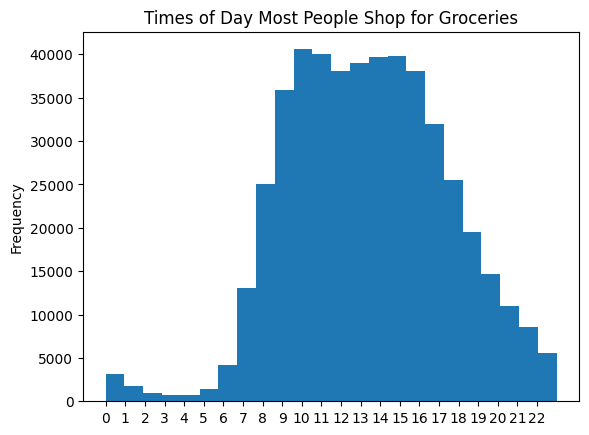

In [36]:
instacart_orders['order_hour_of_day'].plot(x = 'order_hour_of_day',
                                           kind = 'hist',
                                           xlabel = 'Time of Day (24H)',
                                           ylabel = 'Frequency of Shoppers',
                                           title = 'Times of Day Most People Shop for Groceries',
                                           bins = 24)
plt.xticks(range(0,23))
plt.show()

Based on the graph above, it looks like most people shop for groceries between 11 AM and 5 PM!

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Right </div>

### [A3] What day of the week do people shop for groceries?

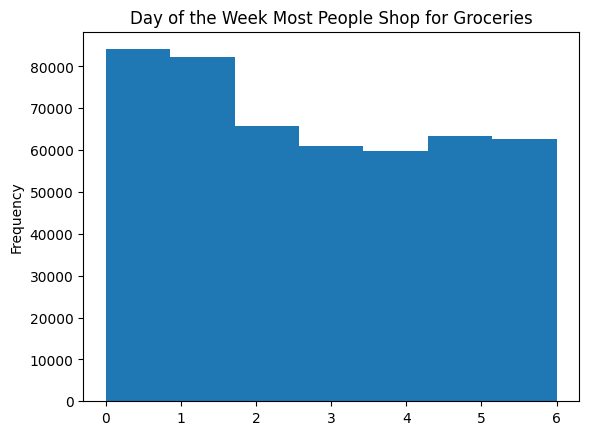

In [37]:
instacart_orders['order_dow'].plot(x = 'order_dow',
                                   kind = 'hist',
                                   xlabel = 'Day of Week',
                                   ylabel = 'Frequency of Shoppers',
                                   title = 'Day of the Week Most People Shop for Groceries',
                                   bins = 7)
plt.show()

Again, assuming that 0 in our dataset equates to Monday, it appears most people shop for groceries on Monday and Tuesday!

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Perfect </div>

### [A4] How long do people wait until placing another order?

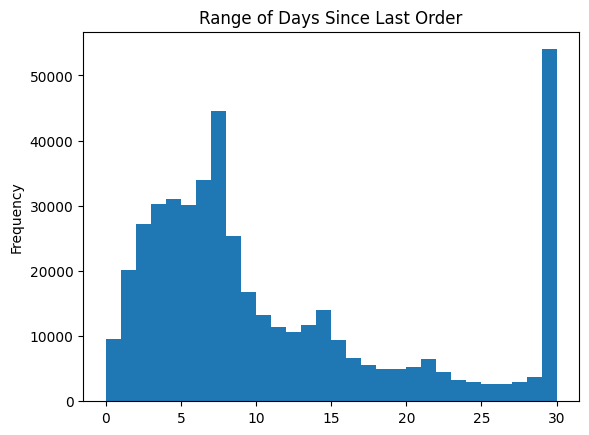

In [38]:
instacart_orders['days_since_prior_order'].plot(x = 'days_since_prior_order',
                                                kind = 'hist',
                                                xlabel = 'Days Since Last Order',
                                                ylabel = 'Frequency',
                                                title = 'Range of Days Since Last Order',
                                                bins = 30
                                                )
plt.show()

From the graph it looks like a large majority of people wait about a week to 10 days to reorder groceries, but the highest amount of people wait 30 days! This could mean that some customers only order once, if the dataset stops at 30 days we may not know when some of those customers order again.

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Correct </div>

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

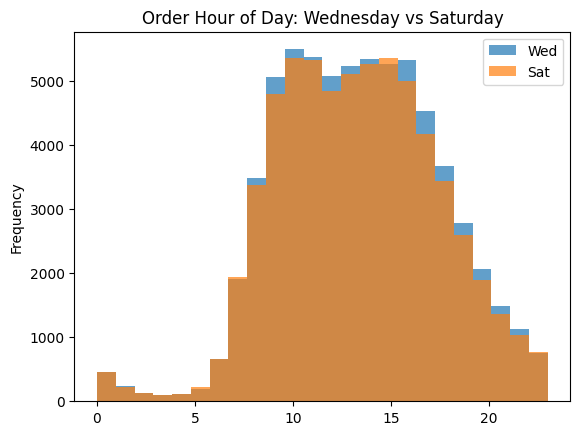

In [39]:
wed_orders = instacart_orders.query("order_dow == 2")[['order_hour_of_day']]
sat_orders = instacart_orders.query("order_dow == 5")[['order_hour_of_day']]
wed_orders.columns = ['Wed']
sat_orders.columns = ['Sat']
wed_sat = pd.concat([wed_orders, sat_orders])
wed_sat.plot(kind = 'hist',
             xlabel = 'Order Hour',
             ylabel = 'Number of Orders',
             title = 'Order Hour of Day: Wednesday vs Saturday',
             legend = ['Wednesday', 'Saturday'],
             alpha = 0.7,
             bins = 24
             )
plt.show()

In [40]:
df_wed_orders = pd.DataFrame(instacart_orders.query("order_dow == 2"))
df_sat_orders = pd.DataFrame(instacart_orders.query("order_dow == 5"))
print(df_wed_orders['order_hour_of_day'].corr(df_sat_orders['order_hour_of_day']))

nan


The overlayed histograms for orders placed on Wednesdays and orders placed on Saturday looks to be nearly identical. This is supported by finding the correlation value between the two days of the week and the hour of the day that orders take place returning a "nan" value. Since correlation relies on division by the standard deviation, if the two values are identical or almost exactly identical, this may explain the "nan" value as it would have to be dividing by zero, which is impossible.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Please use parameter bins = 24~~

<div class="alert alert-block alert-info"> <b>Student answer.</b> <a class="tocSkip"></a> 
</div>
Revised with 24 bins! Results still look very similar between both days

### [B2] What's the distribution for the number of orders per customer?

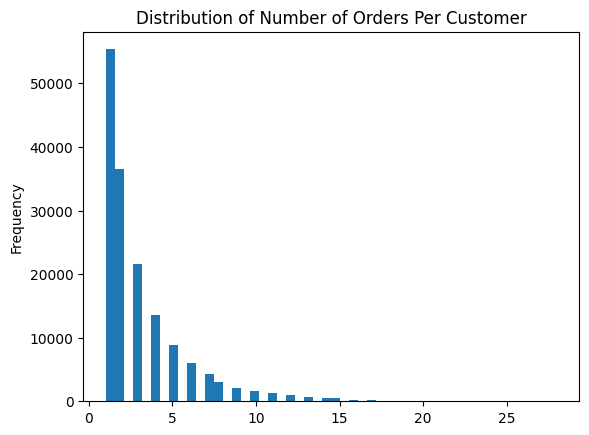

In [41]:
instacart_orders = instacart_orders.groupby('user_id')['order_id'].count().plot(kind = 'hist',
                                                                                xlabel = 'Number of Orders',
                                                                                ylabel = 'Frequency',
                                                                                title = 'Distribution of Number of Orders Per Customer',
                                                                                bins = 50
                                                                               )
#instacart_orders['order_number'].plot(x = 'order_number',
 #                                     kind = 'hist', 
  #                                    xlabel = 'Number of Orders', 
   #                                   ylabel = 'Frequency', 
    #                                  title = 'Distribution of Number of Orders Per Customer', 
     #                                 bins = 50
      #                              )
plt.show()

It looks like most Instacart customers only place 1 order!

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>
    
~~Please group by customer and use order_number max (or count order_id)~~

<div class="alert alert-block alert-info"> <b>Student answer.</b> <a class="tocSkip"></a> 
</div>
I'm confused by what I'm being asked to change here, could you provide some more clarity on the issue? Thanks!

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2</b> <a class="tocSkip"></a>
    
~~First we need to count how many orders made each customer And only after create the distribution~~
    
    instacart_orders.groupby('user_id')['order_id'].count().plot(kind = 'hist' )
    
    

<div class="alert alert-block alert-info"> <b>Student answer.</b> <a class="tocSkip"></a> 
</div>
What is the reasoning behind this solution vs what I had submitted? I can clearly see a much different output on the resulting figure but I want to understand where I went wrong. Thank you!

<div class="alert alert-block alert-success"> <b>Reviewer's comment v3</b> <a 
class="tocSkip"></a>
    
Actually, this is tricky data. Take a look at this:

    instacart_orders.groupby('user_id').agg({'order_id': 'count', 'order_number': 'max'})

We would expect both columns to be the same, but here, the maximum order_number does not match the actual number of orders.

In your code, you're using order_number without aggregation. Now, imagine a customer with 4 orders (order_numbers from 1 to 4)— he will be counted in histograms across bins for 1, 2, 3 and 4 orders, which is incorrect because he actually made 4 orders.

If we had valid data, we could use order_number.max() to determine the total number of orders a customer has made


</div>

In [42]:
instacart_orders.groupby('user_id').agg({'order_id':'count', 'order_number':'max'})

AttributeError: 'AxesSubplot' object has no attribute 'groupby'

### [B3] What are the top 20 popular products (display their id and name)?

In [ ]:
print(order_products['product_id'].value_counts().head(20))

In [ ]:
merged_product_id = order_products.merge(products, on = 'product_id')
top_20 = (merged_product_id.groupby(['product_id','product_name']).size().sort_values(ascending = False).head(20))
print(top_20)

The output of the merged dataframes matches with the top 20 value_counts result from the order_products df

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Super</div>

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [ ]:
typical_order = order_products.groupby('order_id').size()
typical_order

In [ ]:
typical_order.median()

In [ ]:
plt.hist(typical_order, bins = 50)
plt.title =('Distribution of Items Per Order')
plt.xlabel = ('Number of Items Per Order')
plt.ylabel = ('Frequency')
plt.show()
# not sure why my title or lables aren't displaying here. I tried making the figure smaller and that didn't do too much

From calculating the median of the dataset and confirming with the distribution of orders, we can see that people typically order 8 items each time they place an order!

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Perfect </div>

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [ ]:
reordered = order_products[order_products['reordered'] == 1]['product_id'].value_counts().head(20)
reordered

In [ ]:
# .head(20).index -> variable
reordered_20 = reordered.reset_index().merge(products, left_on = 'index', right_on = 'product_id')
reordered_20 = reordered_20.drop(['product_id_x', 'product_id_y'],axis = 1)
reordered_20 = reordered_20.rename(columns = {'index':'product_id'})
reordered_20

Looks like lots of fruits and veggies are very frequently ordered through Instacart!

<div class="alert alert-block alert-success"> <b>Reviewer's comment</b> <a 
class="tocSkip"></a>
Right </div>

### [C3] For each product, what proportion of its orders are reorders?

### [C4] For each customer, what proportion of their products ordered are reorders?

### [C5] What are the top 20 items that people put in their carts first? 